# **My "Liked Songs" playlist analysis in Python**
## Krzysztof Stawarz
### November 2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
# from IPython.display import set_matplotlib_formats

warnings.filterwarnings("ignore")
# set_matplotlib_formats('svg')
sns.set_style(style="darkgrid")

# __Reading Liked Songs dataset__  
__Liked Songs__ is my main playlist because I tend to add all the songs I like here.  
Dataset exctracted with `create_datatest_spotipy.py`

In [2]:
liked_songs = pd.read_csv("datasets/liked_songs.csv")
liked_songs.head()

artists  \
0                               Majki, Mario Dracula   
1                      Chase & Status, Hedex, ArrDee   
2                                         ĆPAJ STAJL   
3                                           HAŁASTRA   
4  Baba Hassan, Pusher, Oska030, Lotuseffekt, Pol...   

                             track_name                   genre  danceability  \
0  Pasek Gucci - La La La - Majki Remix                 klubowe         0.864   
1    Liquor & Cigarettes (feat. ArrDee)          dancefloor dnb         0.578   
2                            Dwa Kolory  polish alternative rap         0.704   
3                              Pośpiech  polish alternative rap         0.684   
4                     Dzieciaki z Ulicy            polish drill         0.797   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.743    9    -4.782     1       0.0973        0.0304          0.000004   
1   0.978    0    -0.210     1       0.3560        0.0730          0.000001   
2   0.611    7    -8.294     1       0.3890        0.0988          0.000000   
3   0.664    1    -8.770     1       0.2060        0.0621          0.000000   
4   0.499    7   -11.366     1       0.3240        0.0335          0.000080   

   liveness  valence    tempo  duration_ms  time_signature  
0    0.1090    0.731  136.005       157105               4  
1    0.0867    0.594  174.937       189257               4  
2    0.0819    0.309  173.915       193103               5  
3    0.1080    0.584   82.073       186182               4  
4    0.1920    0.719  103.889       106154               4

In [3]:
print(f"My 'Liked Songs' playlist contains {liked_songs.shape[0]} songs, \
each described with {liked_songs.shape[1]} attributes.")

My 'Liked Songs' playlist contains 663 songs, each described with 16 attributes.


# __Starting questions__

## __What are most common genres on my playlist?__

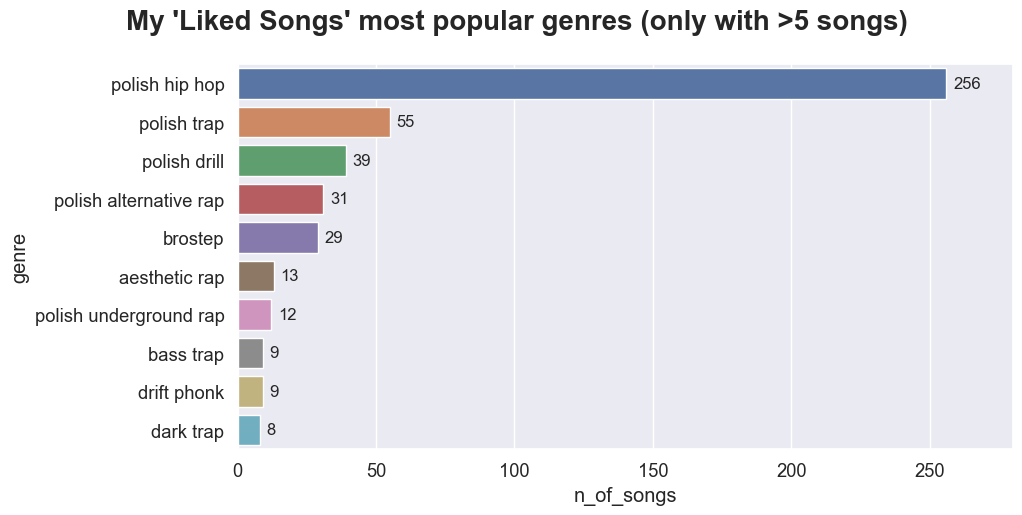

In [4]:
#  grouping and preparing for plot
top_genres = liked_songs.groupby(["genre"]).size().sort_values(ascending=False)
weak_genre_limit = 5
top_genres2plot = top_genres[top_genres > weak_genre_limit]
top_genres2plot = top_genres2plot.reset_index()
top_genres2plot.rename(columns={0:"n_of_songs"}, inplace=True)

#  bar plot
sns.set(font_scale=1.2)
plt.figure(figsize=(10,5))
ax = sns.barplot(data=top_genres2plot,
            y=top_genres2plot["genre"],
            x=top_genres2plot["n_of_songs"],
            orient='h')
ax.bar_label(ax.containers[0], fontsize=12, padding=5);
plt.title(f"My 'Liked Songs' most popular genres (only with >{weak_genre_limit} songs)", 
          weight='bold', 
          pad=25, 
          fontsize=20, 
          x=0.36)
plt.xlim((0, 280))
plt.show()

## __Which artists appears in my playlist the most?__

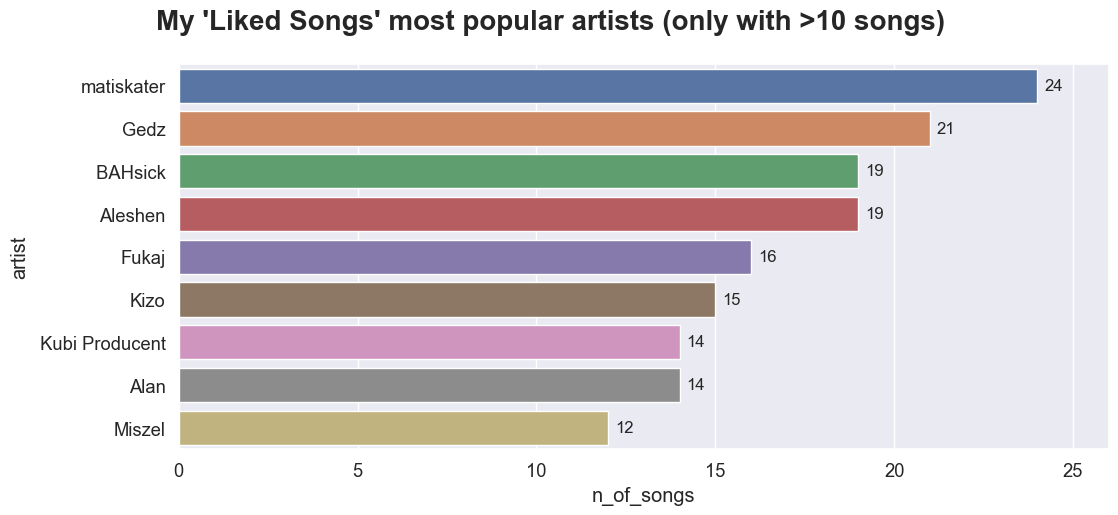

In [5]:
#  creating separate row for each artist using .explode() to group by them easly
tmp = liked_songs.copy()
tmp["artists"] = liked_songs['artists'].str.split(',')
tmp = tmp.explode('artists')

#  grouping and preparing for plot
top_artists = tmp.groupby(["artists"]).size().sort_values(ascending=False)
weak_artist_limit = 10
top_artists2plot = top_artists[top_artists > weak_artist_limit]
top_artists2plot = top_artists2plot.reset_index()
top_artists2plot.rename(columns={"artists": "artist", 0:"n_of_songs"}, inplace=True)

#  bar plot
sns.set(font_scale=1.2)
plt.figure(figsize=(12,5))
ax = sns.barplot(data=top_artists2plot,
            y=top_artists2plot["artist"],
            x=top_artists2plot["n_of_songs"],
            orient='h')
ax.bar_label(ax.containers[0], fontsize=12, padding=5);
plt.title(f"My 'Liked Songs' most popular artists (only with >{weak_artist_limit} songs)", 
          weight='bold', 
          pad=25, 
          fontsize=20, 
          x=0.4)
plt.xlim((0, 26))
plt.show()

## __How will my *Spotify Wrapped* look like ths year?__

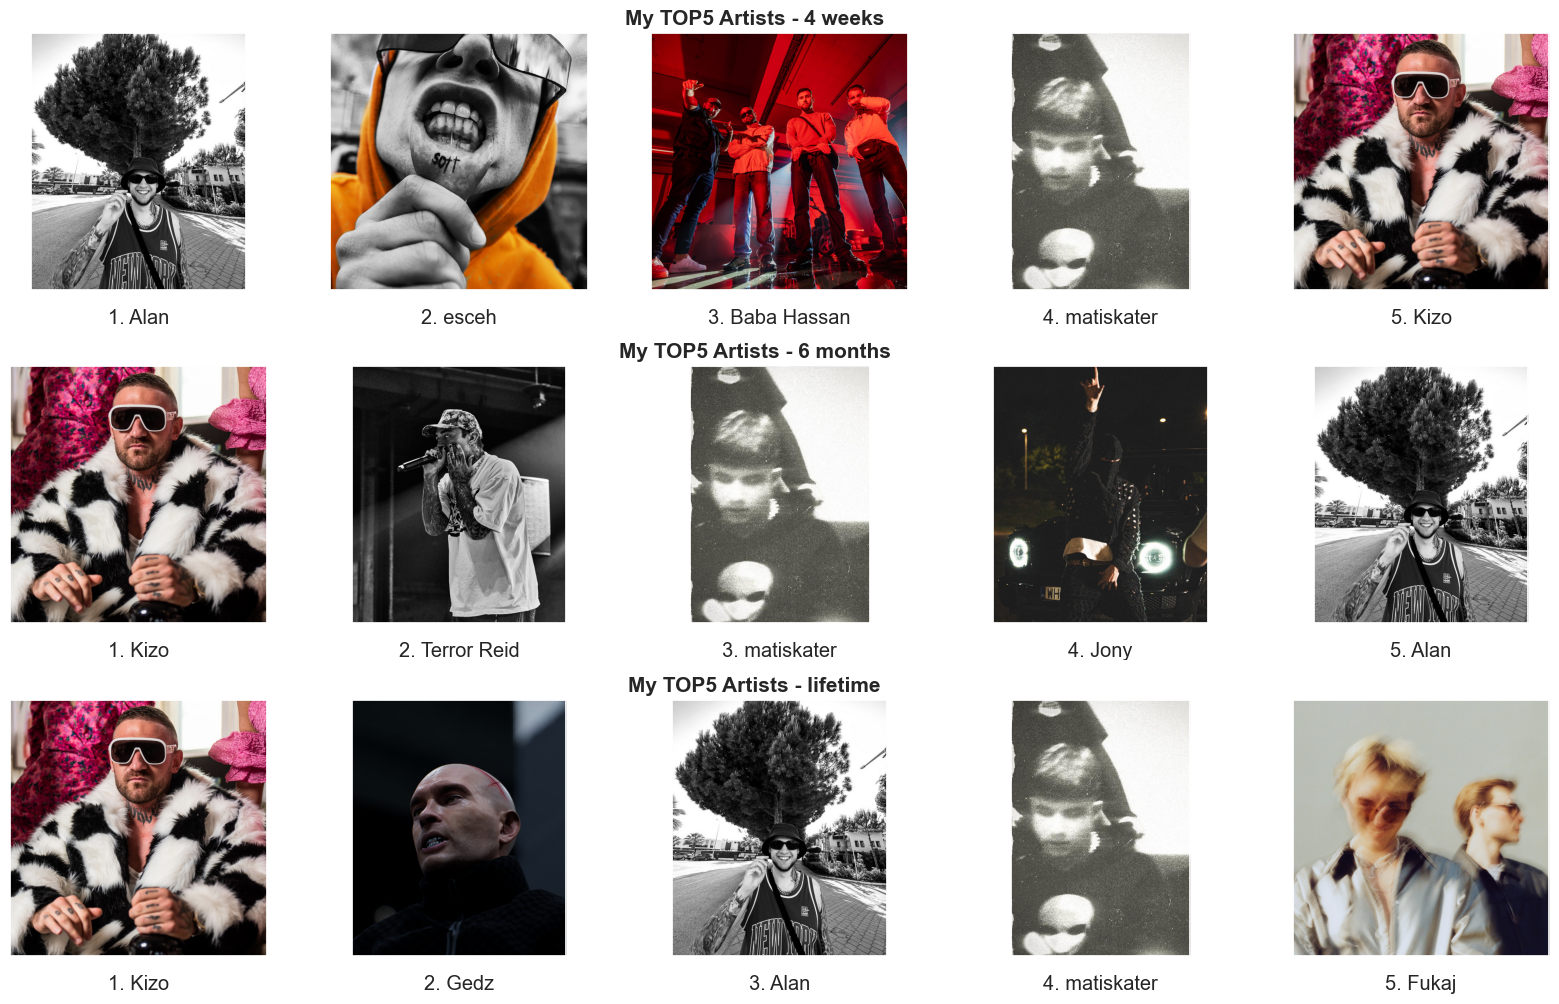

In [6]:
from project_functions import show_spotify_wrapped
show_spotify_wrapped("artists")

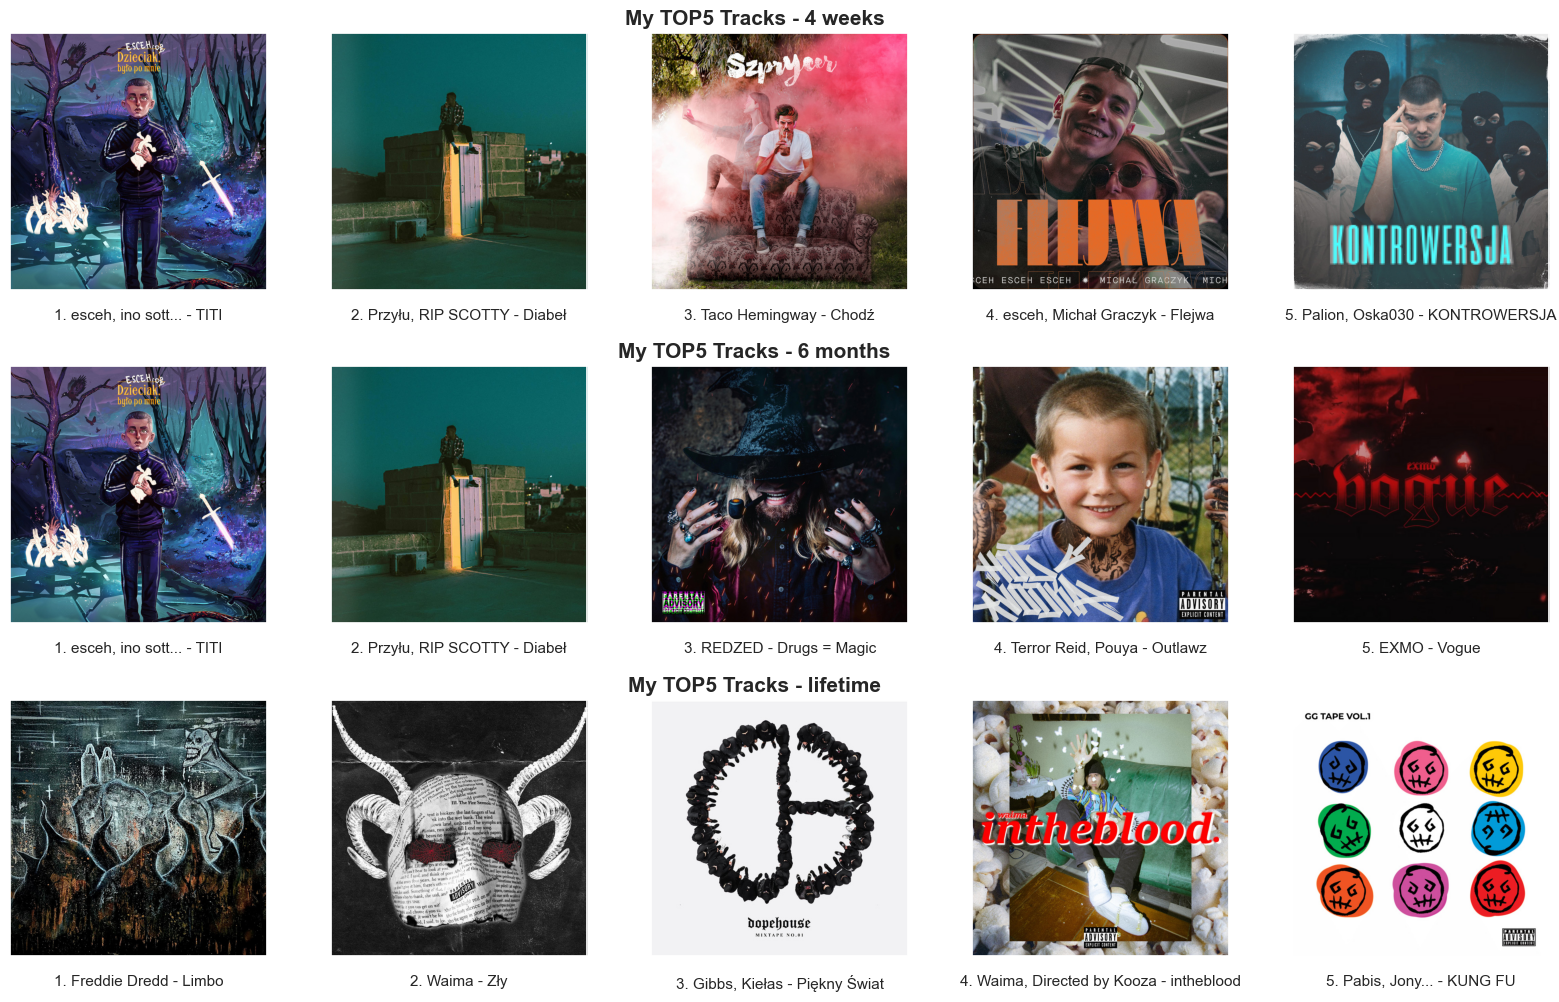

In [7]:
show_spotify_wrapped("tracks")

## __What do `spotipy` features mean?__

__Note__: I used BeautifulSoup to scrap data from official Spotify API (check `project_functions.py` for more details)

In [8]:
from project_functions import get_features_description
from textwrap import wrap
wrap_text = lambda text: '\n'.join(wrap(text))

features_description = get_features_description(
    url="https://developer.spotify.com/documentation/web-api/reference/get-audio-features")
for feature in list(liked_songs.columns)[3:]:
    print(f"{feature}:")
    print(wrap_text((features_description[feature]['description'])), end="\n\n")

danceability:
Danceability describes how suitable a track is for dancing based on a
combination of musical elements including tempo, rhythm stability,
beat strength, and overall regularity. A value of 0.0 is least
danceable and 1.0 is most danceable.

energy:
Energy is a measure from 0.0 to 1.0 and represents a perceptual
measure of intensity and activity. Typically, energetic tracks feel
fast, loud, and noisy. For example, death metal has high energy, while
a Bach prelude scores low on the scale. Perceptual features
contributing to this attribute include dynamic range, perceived
loudness, timbre, onset rate, and general entropy.

key:
The key the track is in. Integers map to pitches using standard Pitch
Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was
detected, the value is -1.

loudness:
The overall loudness of a track in decibels (dB). Loudness values are
averaged across the entire track and are useful for comparing relative
loudness of tracks. Loudness is the 

# __EDA__

In [9]:
liked_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           663 non-null    object 
 1   track_name        663 non-null    object 
 2   genre             578 non-null    object 
 3   danceability      663 non-null    float64
 4   energy            663 non-null    float64
 5   key               663 non-null    int64  
 6   loudness          663 non-null    float64
 7   mode              663 non-null    int64  
 8   speechiness       663 non-null    float64
 9   acousticness      663 non-null    float64
 10  instrumentalness  663 non-null    float64
 11  liveness          663 non-null    float64
 12  valence           663 non-null    float64
 13  tempo             663 non-null    float64
 14  duration_ms       663 non-null    int64  
 15  time_signature    663 non-null    int64  
dtypes: float64(9), int64(4), object(3)
memory us

## `None` genres

In [10]:
liked_songs["genre"].isna().sum()

85

__Note:__ due to my methodology, apparently the first artist of each song with `None`` genre is not that famous, otherwise he would have his genre assigned 

## Converting ms to minutes

In [11]:
liked_songs["duration_minutes"] = liked_songs["duration_ms"]/60_000
liked_songs.drop(["duration_ms"], axis=1, inplace=True)
liked_songs["duration_minutes"].head()

0    2.618417
1    3.154283
2    3.218383
3    3.103033
4    1.769233
Name: duration_minutes, dtype: float64

## Descriptive Statistics

In [12]:
round(liked_songs.iloc[:, 3:].describe().transpose(), 2)

count    mean    std    min    25%     50%     75%     max
danceability      663.0    0.73   0.12   0.34   0.66    0.74    0.81    0.98
energy            663.0    0.68   0.15   0.24   0.57    0.68    0.79    1.00
key               663.0    5.29   3.75   0.00   1.00    6.00    8.00   11.00
loudness          663.0   -7.16   2.54 -16.07  -8.66   -7.11   -5.41    1.18
mode              663.0    0.62   0.49   0.00   0.00    1.00    1.00    1.00
speechiness       663.0    0.23   0.14   0.03   0.10    0.23    0.34    0.86
acousticness      663.0    0.18   0.19   0.00   0.04    0.13    0.27    0.88
instrumentalness  663.0    0.04   0.17   0.00   0.00    0.00    0.00    0.96
liveness          663.0    0.18   0.14   0.03   0.10    0.12    0.22    0.96
valence           663.0    0.51   0.22   0.03   0.34    0.51    0.66    0.97
tempo             663.0  127.70  30.34  58.75  95.03  136.12  150.12  199.77
time_signature    663.0    4.00   0.23   1.00   4.00    4.00    4.00    5.00
duration_minutes  663.0    2.96   0.86   0.83   2.47    2.86    3.37   10.54

## Features distributions

In [13]:
liked_songs_clean = liked_songs.drop(["artists", "track_name", "genre", "key", "mode", "time_signature"], axis=1)
liked_songs_clean.head()

danceability  energy  loudness  speechiness  acousticness  \
0         0.864   0.743    -4.782       0.0973        0.0304   
1         0.578   0.978    -0.210       0.3560        0.0730   
2         0.704   0.611    -8.294       0.3890        0.0988   
3         0.684   0.664    -8.770       0.2060        0.0621   
4         0.797   0.499   -11.366       0.3240        0.0335   

   instrumentalness  liveness  valence    tempo  duration_minutes  
0          0.000004    0.1090    0.731  136.005          2.618417  
1          0.000001    0.0867    0.594  174.937          3.154283  
2          0.000000    0.0819    0.309  173.915          3.218383  
3          0.000000    0.1080    0.584   82.073          3.103033  
4          0.000080    0.1920    0.719  103.889          1.769233

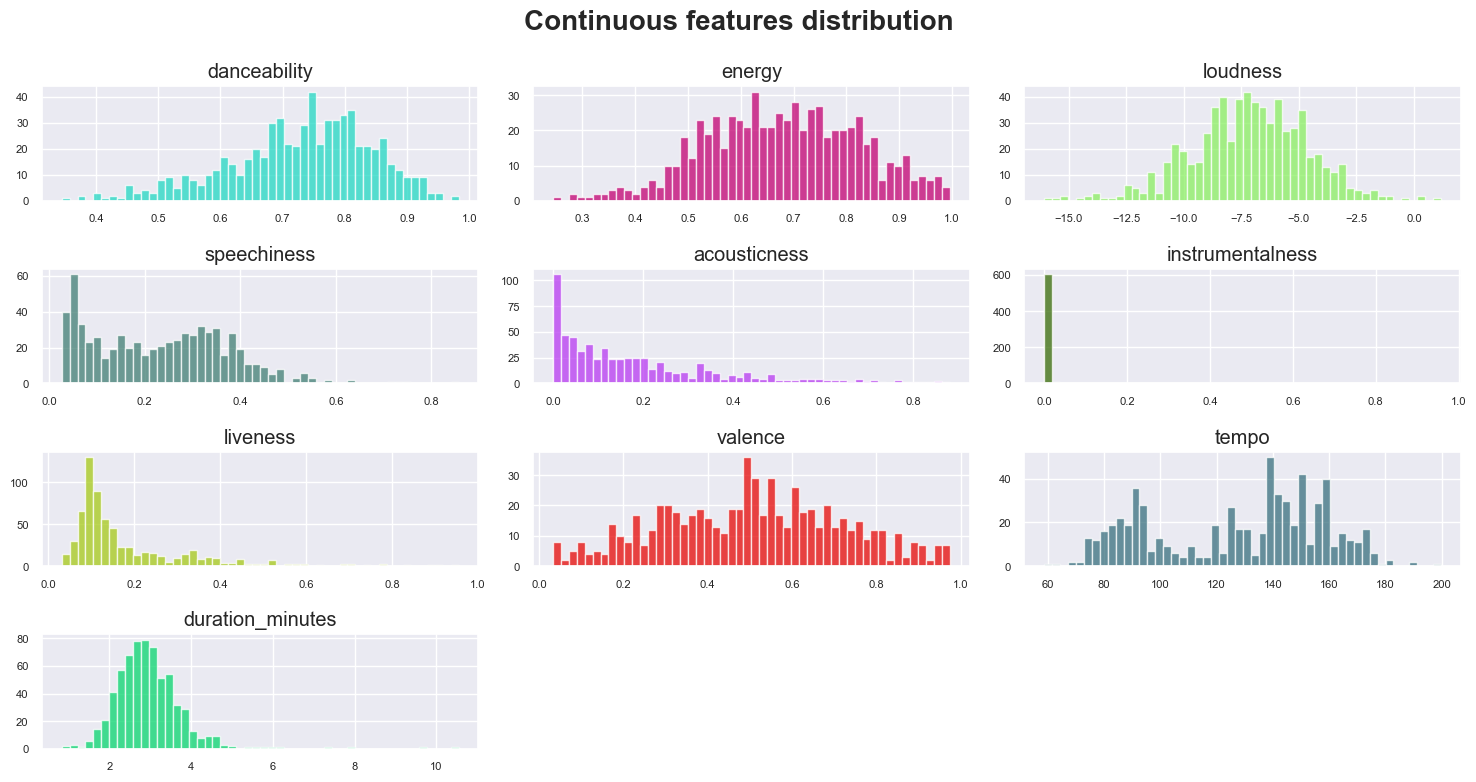

In [14]:
from random import random, seed
seed(1)
fig, axes = plt.subplots(nrows=4, 
                         ncols=3, 
                         figsize=(15,8), 
                         layout="tight")
#  histogram matrix
[axes[x][y].hist(liked_songs_clean.iloc[:, 3*x+y], 
                 color=(random(), random(), random()), 
                 alpha=0.75,
                 bins=50) and 
(axes[x][y]).set(title=list(liked_songs_clean.columns)[3*x+y]) and 
(axes[x][y].tick_params(axis="both", 
                        labelsize=8))
    if (x!=3 or y<1) 
    else plt.delaxes(axes[x][y]) 
        for y in range(3) 
        for x in range(4)]
fig.suptitle("Continuous features distribution", 
             fontsize=20, 
             weight="bold")
plt.show()

## What is up with `instrumentalness`?

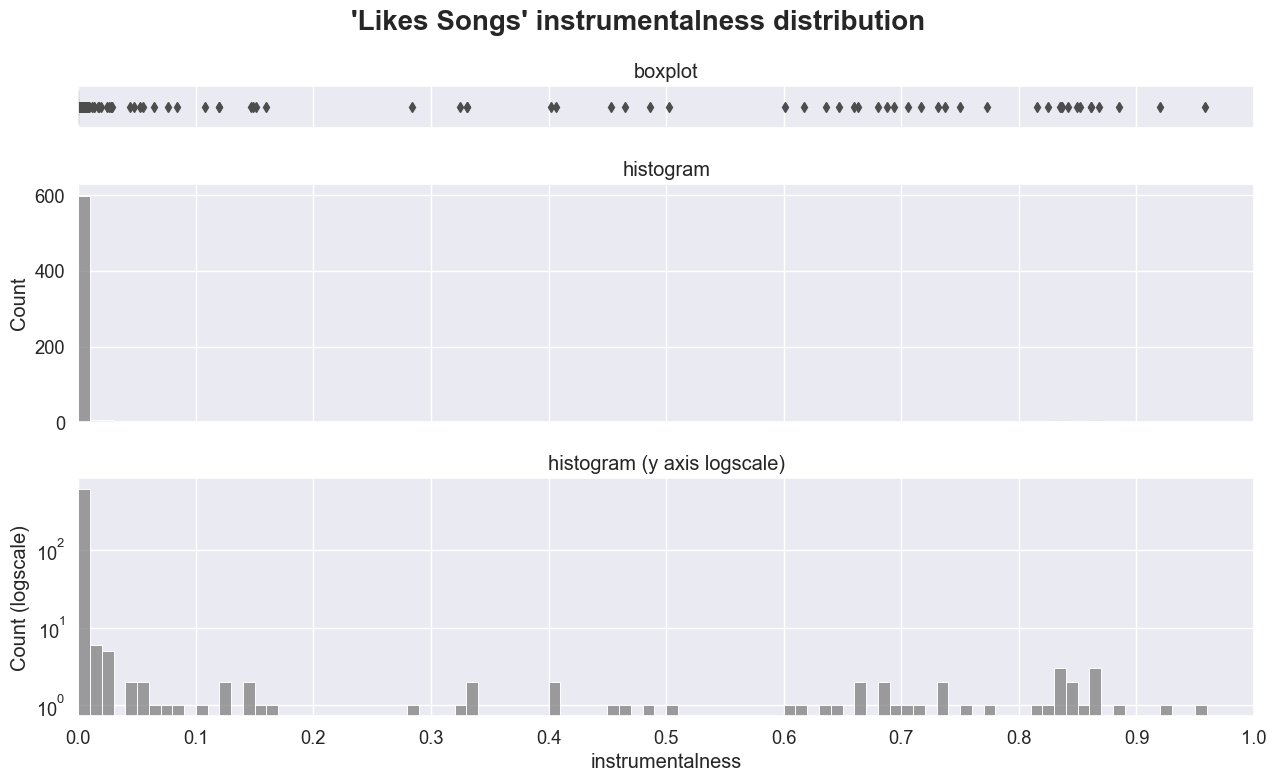

Predicts whether a track contains no vocals. "Ooh" and "aah" sounds
are treated as instrumental in this context. Rap or spoken word tracks
are clearly "vocal". The closer the instrumentalness value is to 1.0,
the greater likelihood the track contains no vocal content. Values
above 0.5 are intended to represent instrumental tracks, but
confidence is higher as the value approaches 1.0.


In [15]:
#  draw boxplot and histogram
fig, (ax_box, ax_hist, ax_hist_log) = plt.subplots(3, 
                                      figsize=(13,8), 
                                      gridspec_kw={
                                          "height_ratios": (.15, .85, .85)}, 
                                      sharex=True,
                                      layout="tight")
plot_title = f"'Likes Songs' instrumentalness distribution"
sns.boxplot(liked_songs["instrumentalness"], 
            color="grey", 
            orient="h", 
            ax=ax_box)
ax_box.set(yticklabels=[], 
           title="boxplot")
sns.histplot(liked_songs["instrumentalness"], 
             color="grey", 
             ax=ax_hist, 
             binwidth=.01, 
             log_scale=(False, False))
ax_hist.set(xticks=np.arange(start=.0, 
                             stop=1.1, 
                             step=.1), 
            title="histogram") 
sns.histplot(liked_songs["instrumentalness"], 
             color="grey", 
             ax=ax_hist_log, 
             binwidth=.01, 
             log_scale=(False, True))
ax_hist_log.set(xticks=np.arange(start=.0, 
                                 stop=1.1, 
                                 step=.1), 
            title="histogram (y axis logscale)",
            ylabel="Count (logscale)") 
plt.xlim((.0, 1.))
fig.suptitle(plot_title, 
             weight="bold", 
             fontsize=20)
plt.show()

print(wrap_text(features_description["instrumentalness"]["description"]))

instrumentalness     
no_vocals          98
vocals            565

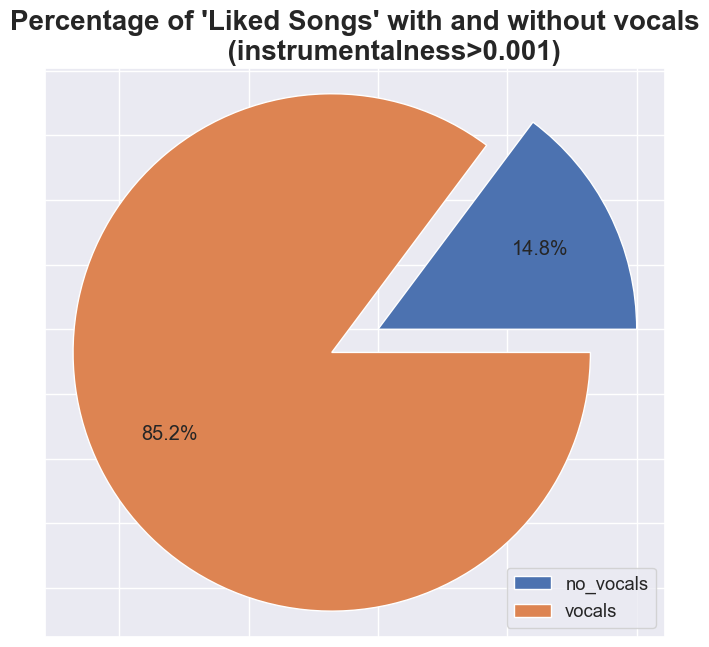

In [16]:
#  instrumentalness feature binarization
threshold = 0.001
vocals_or_no = pd.DataFrame(liked_songs["instrumentalness"].apply(lambda x: 
    "no_vocals" if x>threshold else "vocals")).groupby(["instrumentalness"]).size()

#  showing exact values
display(pd.DataFrame(vocals_or_no, 
                     columns=[" "]))

#  plot
plt.figure(figsize=(8,8))
patches, texts, _ = plt.pie(vocals_or_no, 
                            explode=[0., 0.2], 
                            autopct="%1.1f%%", 
                            pctdistance=.7, 
                            frame=True)
plt.legend(patches, 
           vocals_or_no.index, 
           loc="best")
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.title(f"Percentage of 'Liked Songs' with and without vocals\n\
          (instrumentalness>{threshold})", 
          weight="bold", 
          fontsize=20)
plt.show()

Seems like most of my tracks have vocals. This feature should be a binary tho

## Features correlation

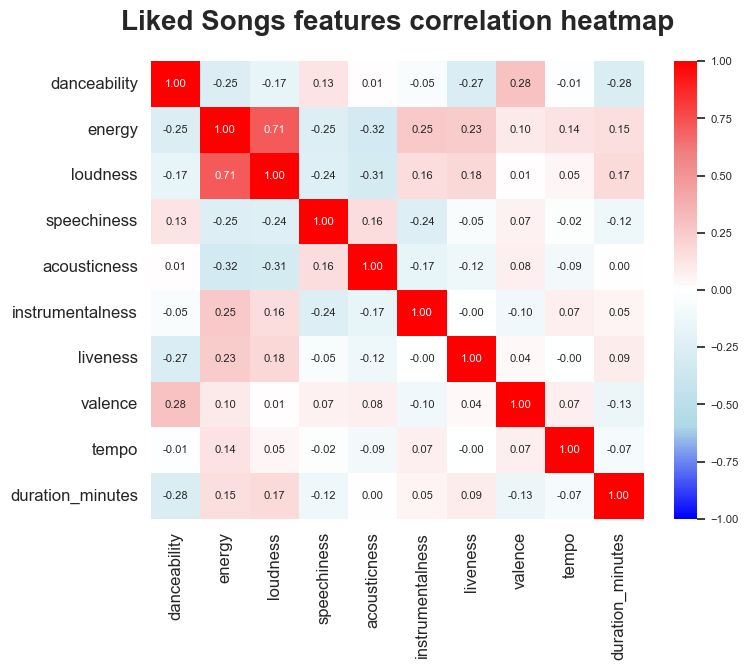

In [17]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("mycmap", 
                                                           list(zip([.0, .2, .5, .8 , 1.] , 
                                                           ["blue", "lightblue", "white", "lightcoral", "red"])))

plt.figure(figsize=(8, 7),
           layout="tight")
heatmap = sns.heatmap(liked_songs_clean.corr(), 
            annot=True, 
            fmt=".2f", 
            vmin=-1., vmax=1., 
            cmap=cmap,
            annot_kws={"fontsize": 8})
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
heatmap.set_xticklabels(heatmap.get_xticklabels(), 
                        size=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), 
                        size=12) 

plt.title("Liked Songs features correlation heatmap", 
          weight="bold", 
          fontsize=20,
          y=1.05)
plt.show()

To be honest, this is the most white and the least correlated heatmap I have ever plotted...  
But it might be good enough with `Naive Bayes Classification`

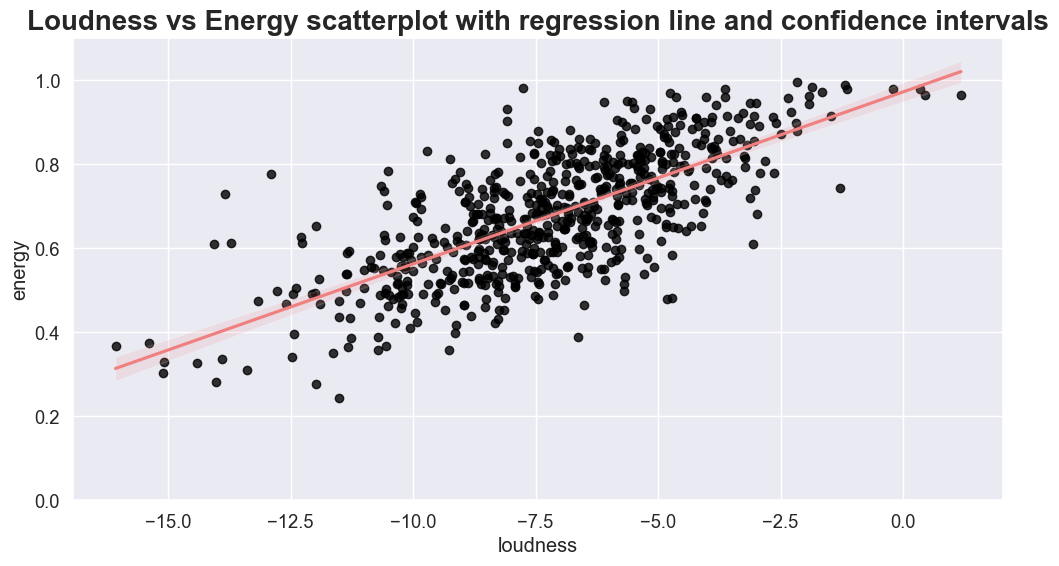

In [18]:
plt.figure(figsize=(12,6))
sns.regplot(x=liked_songs["loudness"], 
            y=liked_songs["energy"], 
            scatter_kws={"color": "black"}, 
            line_kws={"color": "lightcoral"})
plt.ylim(0, 1.1)
plt.title("Loudness vs Energy scatterplot with regression \
line and confidence intervals", 
          weight="bold", 
          fontsize=20)
plt.show()

Apparently in my case, louder the track, the more energetic it is and vice versa.

# __Machine Learnnig__

## Rough classification  
Just because I'm curious looking at features distributions and lack of correlation between attributes

In [19]:
polish_rap_cols = [
    "polish hip hop", 
    "polish trap", 
    "polish drill", 
    "polish underground rap", 
    "polish alternative rap"
]
liked_songs_clean["is_polish_rap"] = liked_songs["genre"].apply(lambda x: x in polish_rap_cols)
liked_songs_clean.head()

danceability  energy  loudness  speechiness  acousticness  \
0         0.864   0.743    -4.782       0.0973        0.0304   
1         0.578   0.978    -0.210       0.3560        0.0730   
2         0.704   0.611    -8.294       0.3890        0.0988   
3         0.684   0.664    -8.770       0.2060        0.0621   
4         0.797   0.499   -11.366       0.3240        0.0335   

   instrumentalness  liveness  valence    tempo  duration_minutes  \
0          0.000004    0.1090    0.731  136.005          2.618417   
1          0.000001    0.0867    0.594  174.937          3.154283   
2          0.000000    0.0819    0.309  173.915          3.218383   
3          0.000000    0.1080    0.584   82.073          3.103033   
4          0.000080    0.1920    0.719  103.889          1.769233   

   is_polish_rap  
0          False  
1          False  
2           True  
3           True  
4           True

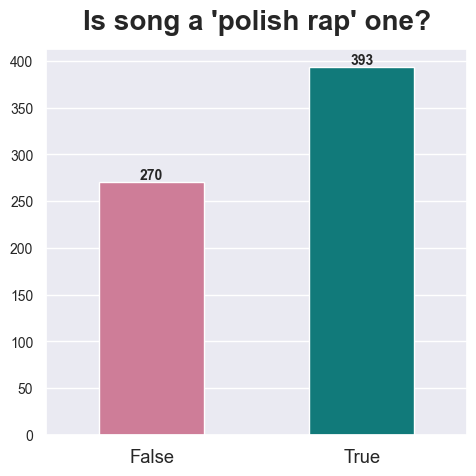

In [20]:
#  grouping
polish_rap_grouped = liked_songs_clean.groupby(["is_polish_rap"])["is_polish_rap"].count()

#  color coding
color_coder = {
    False: "palevioletred",
    True: "darkcyan"
}

#  barplot
plt.figure(figsize=(5, 5),
           layout="tight")
ax = sns.barplot(x=polish_rap_grouped.index,
            y=polish_rap_grouped.values,
            width=0.5,
            palette=[color_coder[False], color_coder[True]])
for label in ax.containers:
    ax.bar_label(label,
                 size=10,
                 weight="bold")
plt.title("Is song a 'polish rap' one?",
          weight="bold",
          fontsize=20,
          y=1.03)
plt.yticks(size=10)
plt.xlabel("")
plt.show()

In [21]:
X = liked_songs_clean.iloc[:, :-1]
y = liked_songs_clean.iloc[:, -1]

## PCA

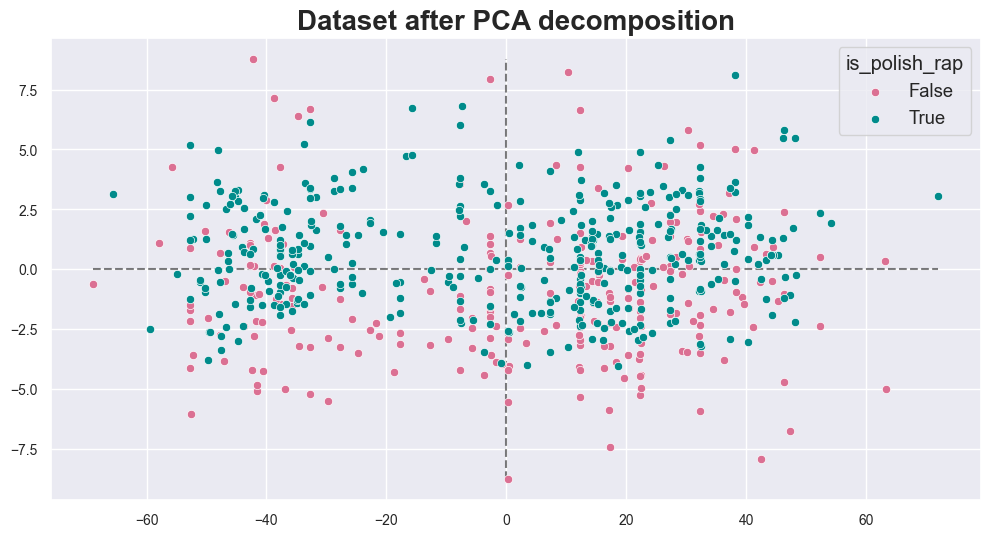

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(X)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=pca[y==False][:, 0],
                y=pca[y==False][:, 1], 
                color=color_coder[False],
                zorder=3)
sns.scatterplot(x=pca[y==True][:, 0],
                y=pca[y==True][:, 1], 
                color=color_coder[True],
                zorder=4)
plt.legend(color_coder,
           title="is_polish_rap",
           loc="best")
plt.vlines(x=0,
           ymin=min(pca[:, 1]),
           ymax=max(pca[:, 1]),
           zorder=1,
           color="black",
           linestyles="dashed",
           alpha=.5)
plt.hlines(y=0,
           xmin=min(pca[:, 0]),
           xmax=max(pca[:, 0]),
           zorder=2,
           color="black",
           linestyles="dashed",
           alpha=.5)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title("Dataset after PCA decomposition",
          weight="bold",
          fontsize=20)
plt.show()

It's messy, means `polish rap` songs have no features defining them.  
No need to try clutering then

## Naive Bayes Classification

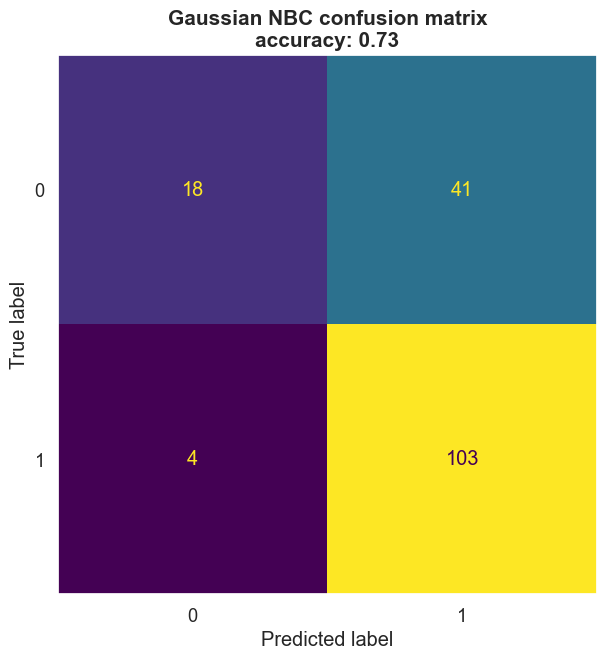

              precision    recall  f1-score   support

       False       0.82      0.31      0.44        59
        True       0.72      0.96      0.82       107

    accuracy                           0.73       166
   macro avg       0.77      0.63      0.63       166
weighted avg       0.75      0.73      0.69       166



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, \
    ConfusionMatrixDisplay, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=.75,
                                                    random_state=2023)

gnb = GaussianNB().fit(X_train, y_train)
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
fig, ax = plt.subplots(figsize=(7, 7))
cmd.plot(colorbar=False,
         ax=ax)
plt.grid(False)
plt.title(f"Gaussian NBC confusion matrix\naccuracy: {accuracy:.2f}",
          weight="bold",
          fontsize=15)
plt.show()

print(classification_report(y_test, y_pred))

Mediocre results. I was expecting this since the data is messy, chaotic and kinda random

# __Artists connections graph__

This is my first time playing with graphs in real world scenario, so I'll do my best to visualize my idea with `networkx`

In [24]:
from itertools import combinations, chain
from collections import Counter

top_artists_clean = top_artists[top_artists>1]  # artists that appeard more than 1 time in my playlist
# all possible combinations between 2 artists in a each row only between artists included in above filter
links = [list(combinations([artist 
                            for artist in row.split(", ") 
                            if artist in top_artists_clean], 2)) 
         for row in liked_songs["artists"]]
links_clear = list(chain(*[link for link in links if len(link)>0]))  # flatten the links list
links_clear = [tuple(sorted(link)) for link in links_clear]
links_strengths = dict(Counter(links_clear))  # number of songs together
links_clear_unique = [tuple(sorted(t)) for t in set(tuple(sorted(t)) for t in links_clear)]

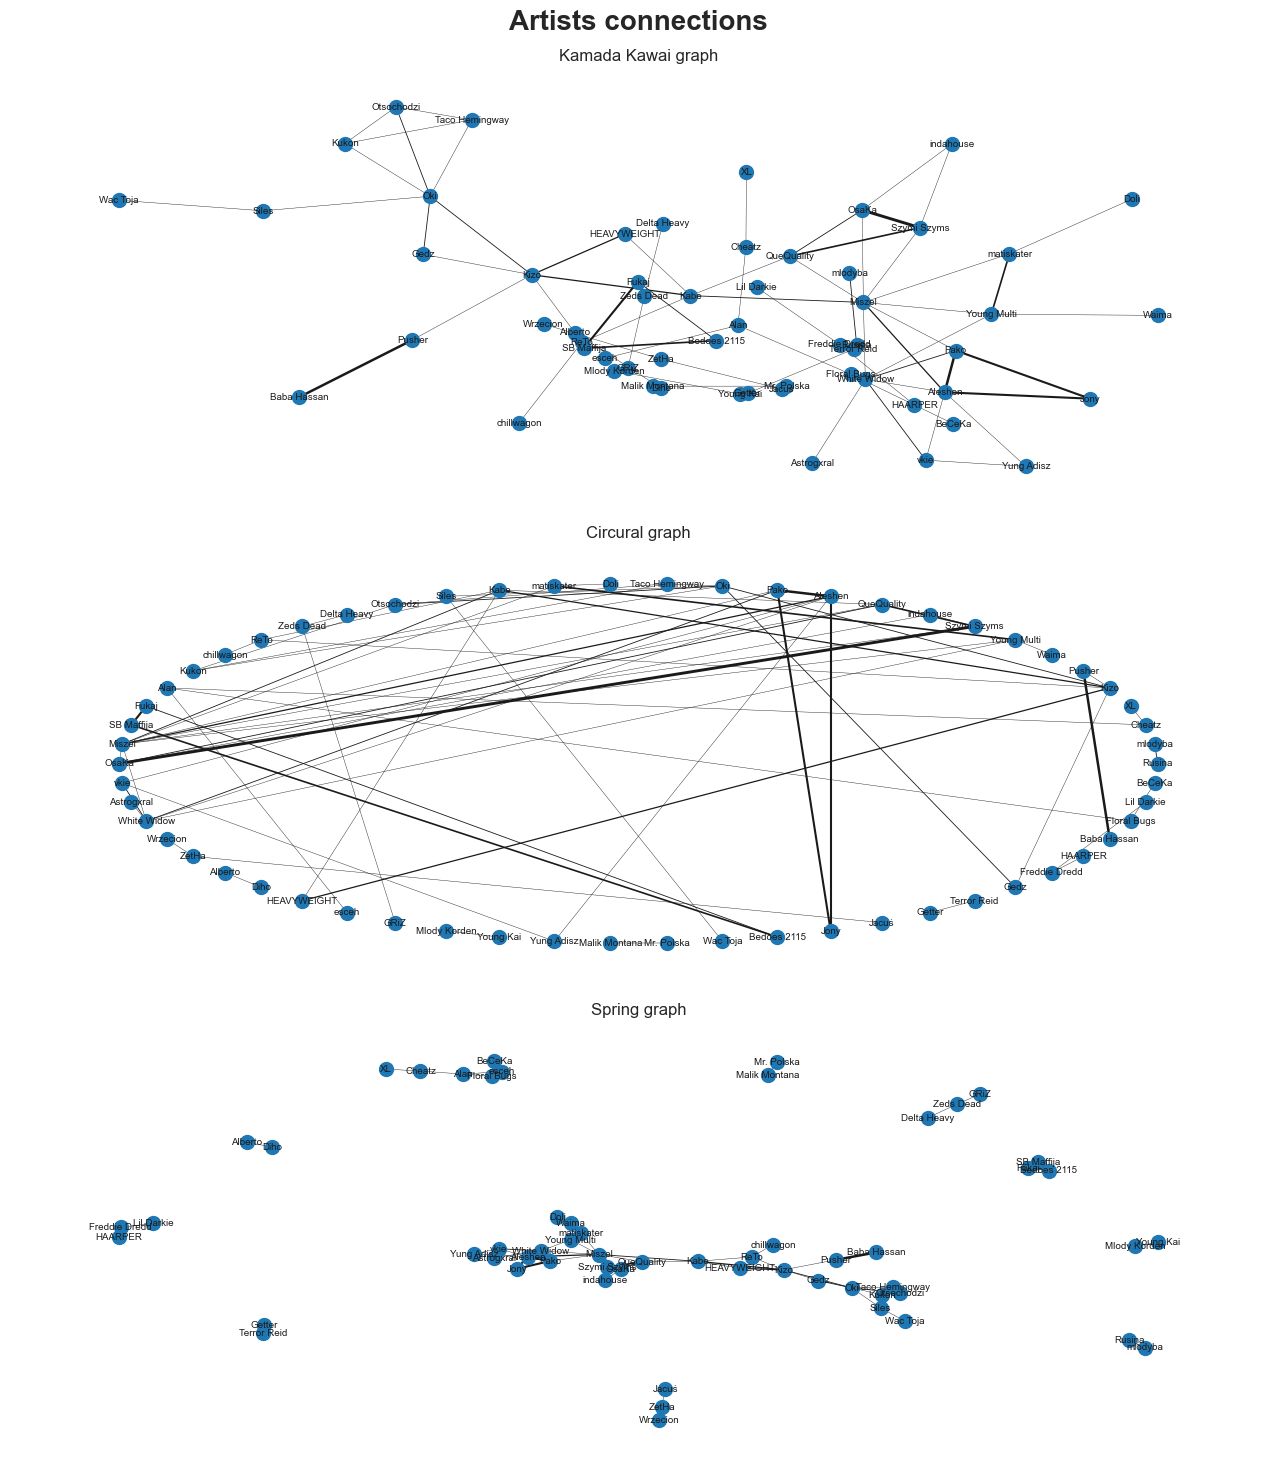

In [25]:
import networkx as nx

G = nx.Graph()
G.add_edges_from(links_clear_unique)
edges_width = [.3*(links_strengths[(e[0], e[1])] 
                if (e[0], e[1]) in links_strengths.keys() 
                else links_strengths[(e[1], e[0])])
               for e in G.edges]

fig, axes = plt.subplots(3, figsize=(13, 15),
                       layout="tight")
fig.suptitle("Artists connections",
             weight="bold",
             fontsize=20)
nx.draw_kamada_kawai(G, 
                     with_labels=True, 
                     font_size=7, 
                     ax=axes[0],
                     node_size=100,
                     width=edges_width)
axes[0].set_title('Kamada Kawai graph', 
                  fontsize=12)
plt.axis("off")
nx.draw_circular(G, 
                 with_labels=True, 
                 font_size=7, 
                 ax=axes[1],
                 node_size=100,
                 width=edges_width)
axes[1].set_title('Circural graph', 
                  fontsize=12)
plt.axis("off")
nx.draw_spring(G, 
                 with_labels=True, 
                 font_size=7, 
                 ax=axes[2],
                 node_size=100,
                 width=edges_width)
axes[2].set_title('Spring graph', 
             fontsize=12)
plt.axis("off")
plt.show()

__In the middle of the 3rd graph a cluster of "mainstream rappers" can be seen. All clusters around are smaller, more underground artists/groups__

So this is basically one way to represent artists connections in my playlist.  
As said previously, this was my first ever attempt to visualize a graph in python. Obviously there is a room to improve.  
I hope my next graphs will be prettier! Maybe one day I will commit one full project on big graph visualizatin.  
`Networx` seems to be super powerfull tool and I'm looking forward to using it more!

# __Finding other songs I might like__
using `TOP50 POLAND` and `TOP50 WOLRD` playlists and `cosine similarity`

In [26]:
top50_poland = pd.read_csv("datasets/top50_poland.csv")
top50_world = pd.read_csv("datasets/top50_world.csv")

In [27]:
top50_poland.head()

artists                       track_name  \
0  bambi, Young Leosia, PG$, @atutowy                              BFF   
1                               Wham!  Last Christmas - Single Version   
2                        Mariah Carey  All I Want for Christmas Is You   
3                       ReTo, Wroobel                            Fluid   
4                Paluch, Miroff, Poly                          Mam Cię   

            genre  danceability  energy  key  loudness  mode  speechiness  \
0  polish hip hop         0.685   0.723    6    -7.159     0       0.0887   
1    new romantic         0.733   0.598    2    -8.228     1       0.0278   
2       dance pop         0.336   0.627    7    -7.463     1       0.0384   
3  polish hip hop         0.765   0.578    8    -8.178     1       0.0815   
4  polish hip hop         0.863   0.661    7    -6.406     0       0.0897   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0        0.0293          0.000018    0.1030    0.435  145.955       174247   
1        0.2120          0.000004    0.1560    0.935  107.732       265960   
2        0.1640          0.000000    0.0708    0.350  150.273       241107   
3        0.1990          0.000001    0.2220    0.575  137.996       142206   
4        0.1120          0.000000    0.1100    0.456   94.976       141500   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

In [28]:
top50_world.head()

artists                         track_name            genre  \
0  Mariah Carey    All I Want for Christmas Is You        dance pop   
1         Wham!    Last Christmas - Single Version     new romantic   
2    Tate McRae                             greedy            alt z   
3    Brenda Lee  Rockin' Around The Christmas Tree  adult standards   
4        Mitski              My Love Mine All Mine   brooklyn indie   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.336   0.627    7    -7.463     1       0.0384         0.164   
1         0.733   0.598    2    -8.228     1       0.0278         0.212   
2         0.750   0.733    6    -3.180     0       0.0319         0.256   
3         0.589   0.472    8    -8.749     1       0.0502         0.614   
4         0.504   0.308    9   -14.958     1       0.0321         0.868   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  
0          0.000000    0.0708    0.350  150.273       241107               4  
1          0.000004    0.1560    0.935  107.732       265960               4  
2          0.000000    0.1140    0.844  111.018       131872               1  
3          0.000000    0.5050    0.898   67.196       126267               4  
4          0.135000    0.1580    0.121  113.950       137773               4

## Converting ms to minutes

In [29]:
top50_poland["duration_minutes"]=top50_poland["duration_ms"]/60_000
top50_poland.drop(["duration_ms"], axis=1, inplace=True)
top50_world["duration_minutes"]=top50_world["duration_ms"]/60_000
top50_world.drop(["duration_ms"], axis=1, inplace=True)

## Checking similarity with `cosine_similarity`

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

liked_songs_numeric = MinMaxScaler().fit_transform(liked_songs.iloc[:, 3:])
top50_poland_numeric = MinMaxScaler().fit_transform(top50_poland.iloc[:, 3:])
top50_world_numeric = MinMaxScaler().fit_transform(top50_world.iloc[:, 3:])

sim_mat_poland = cosine_similarity(top50_poland_numeric, liked_songs_numeric)
top50_poland_most_similar = top50_poland.iloc[:, :2]
top50_poland_most_similar["similar2liked_songs"] = pd.DataFrame(sim_mat_poland).sum(axis=1)
top50_poland_most_similar["similar2liked_songs"] = MinMaxScaler().\
    fit_transform(np.array(top50_poland_most_similar["similar2liked_songs"]).reshape(-1,1))
top_p = top50_poland_most_similar.sort_values(by=["similar2liked_songs"], ascending=False).head()
mid_blanks = pd.DataFrame({col_name:["-"] for col_name in top50_poland_most_similar.columns}, 
                          index=["-"])
bottom_p = top50_poland_most_similar.sort_values(by=["similar2liked_songs"], ascending=False).tail()
pd.concat([top_p, mid_blanks, bottom_p])

artists                                   track_name  \
3                 ReTo, Wroobel                                        Fluid   
31  Pusher, GRACEK, Baba Hassan                                    Leje Wina   
39                Kwiat Jabłoni                                      Od nowa   
33               Daria Zawiałow                             Z Tobą na chacie   
18                Ariana Grande                                Santa Tell Me   
-                             -                                            -   
36               Arctic Monkeys                             I Wanna Be Yours   
21                  Dean Martin       Let It Snow! Let It Snow! Let It Snow!   
47                       Mitski                        My Love Mine All Mine   
30                Michael Bublé  It's Beginning to Look a Lot like Christmas   
44                   Lord Huron                             The Night We Met   

   similar2liked_songs  
3                  1.0  
31            0.970521  
39            0.953194  
33            0.943403  
18            0.923492  
-                    -  
36            0.377414  
21            0.369643  
47            0.320618  
30            0.258644  
44                 0.0

I do like `ReTo`, `Baba Hassan`, `Pusher` and they are rappers  
I don't really care about `Michael Buble`, `Arctic Monkey` and I don't really know the bottom of this list

In [31]:
sim_mat_world = cosine_similarity(top50_world_numeric, liked_songs_numeric)
top50_world_most_similar = top50_world.iloc[:, :2]
top50_world_most_similar["similar2liked_songs"] = pd.DataFrame(sim_mat_world).sum(axis=1)
top50_world_most_similar["similar2liked_songs"] = MinMaxScaler().\
    fit_transform(np.array(top50_world_most_similar["similar2liked_songs"]).reshape(-1,1))
top_w = top50_world_most_similar.sort_values(by=["similar2liked_songs"], ascending=False).head()
bottom_w = top50_world_most_similar.sort_values(by=["similar2liked_songs"], ascending=False).tail()
pd.concat([top_w, mid_blanks, bottom_w])

artists                                   track_name  \
10             Jung Kook, Latto          Seven (feat. Latto) (Explicit Ver.)   
7                  Taylor Swift                                 Cruel Summer   
49  cassö, RAYE, D-Block Europe                                        Prada   
18                Ariana Grande                                Santa Tell Me   
27           Maluma, Carin Leon                                  Según Quién   
-                             -                                            -   
19                  Dean Martin       Let It Snow! Let It Snow! Let It Snow!   
23               Arctic Monkeys                             I Wanna Be Yours   
4                        Mitski                        My Love Mine All Mine   
15                Michael Bublé  It's Beginning to Look a Lot like Christmas   
38                   Lord Huron                             The Night We Met   

   similar2liked_songs  
10                 1.0  
7              0.99746  
49            0.962907  
18            0.942263  
27            0.938201  
-                    -  
19            0.380836  
23            0.374905  
4             0.334635  
15            0.262546  
38                 0.0

Well, I wasn't expecting much from top 50 songs worldwide since I mostly listen to polish hip-hop and EDM.  
It's cool `Lord Huron - The Night We Met` is again at the bottom. I hate this song. I wish it never existed.

_Krzysztof Stawarz_